In [27]:
import sys
import scipy.io.wavfile
import numpy as np
import matplotlib.pyplot as plt

In [28]:
# 音声ファイルの読み込み
args = sys.argv
wav_filename = '/Users/toranosuke/Desktop/dataset/s1/s1_downstairs_nowall_trial1/A0_1_0/recording0_0_0.wav'
rate, data = scipy.io.wavfile.read(wav_filename)

In [29]:
# 音声データの表示
data = data / ((2**16)/2)
time = np.arange(0, data.shape[0]/rate, 1/rate)

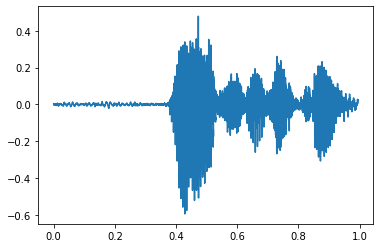

In [30]:
# データプロット
plt.plot(time, data)
plt.show()

In [31]:
rate

48000

# FFTによる周波数分析

## グラフを書いてみる

In [32]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import signal

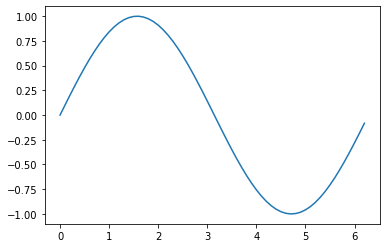

In [33]:
x = np.arange(0, 2*np.pi, 0.1)
y  = np.sin(x)
plt.plot(x, y)
# plt.show()

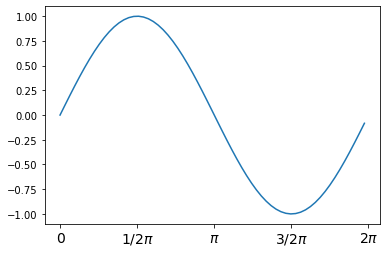

In [34]:
# グラフのx軸をΠで表示してみる
x = np.arange(0, 2*np.pi, 0.1)
y = np.sin(x)
plt.xticks(np.arange(0, 2.1*np.pi, 0.5*np.pi), ['0', '1/2$\pi$', u'$\pi$', '3/2$\pi$', u'2$\pi$'], fontsize=14)
plt.plot(x, y)

## データの作成

In [35]:
N = 32 #データ数
n = np.arange(N)
freq = 3 #周期
signal = np.sin(freq*2*np.pi*n/N)

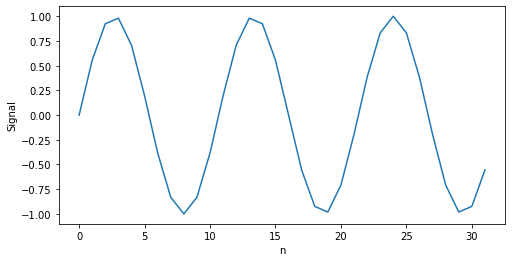

In [36]:
# グラフ表示
plt.figure(figsize=(8,4))
plt.xlabel('n')
plt.ylabel('Signal')
plt.plot(signal)

## 高速フーリエ変換

In [37]:
F = np.fft.fft(signal)

In [38]:
print(type(F), F.dtype)
print(F)

<class 'numpy.ndarray'> complex128
[-1.04450746e-16+0.00000000e+00j -5.89438645e-16+1.99840144e-15j
 -1.62913523e-15+7.75240208e-16j -6.80668758e-15-1.60000000e+01j
 -7.07620854e-16-2.82164363e-15j -1.45349435e-16-1.77635684e-15j
  1.53952553e-15-2.97587939e-15j -2.35000209e-16+8.37749009e-16j
 -1.46447395e-15-2.35922393e-15j  1.18691819e-15-3.33066907e-15j
 -5.69223578e-16-1.63014250e-15j  1.85305201e-15-2.88657986e-15j
  3.88489959e-15-1.37835370e-15j  1.63100740e-15+0.00000000e+00j
  2.12840944e-15-9.94689482e-17j  1.72344339e-15+3.29219264e-16j
 -3.82006502e-16+0.00000000e+00j  1.18691819e-15-6.66133815e-16j
  2.12840944e-15+9.94689482e-17j  1.63100740e-15+0.00000000e+00j
  3.88489959e-15+1.37835370e-15j  1.63100740e-15+3.55271368e-15j
 -5.69223578e-16+1.63014250e-15j  2.04442775e-16+4.07879275e-15j
 -1.46447395e-15+2.35922393e-15j -5.89438645e-16-1.55431223e-15j
  1.53952553e-15+2.97587939e-15j -8.11483250e-16+1.11022302e-15j
 -7.07620854e-16+2.82164363e-15j -7.25077679e-15+1.6000

### 周期を確認

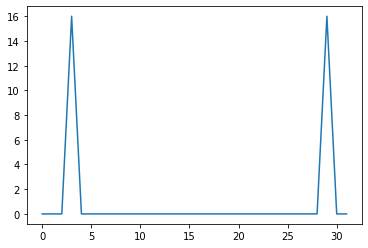

In [39]:
F_abs = np.abs(F)
plt.plot(F_abs)

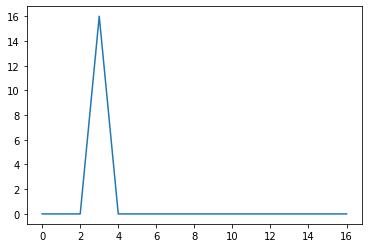

In [40]:
plt.plot(F_abs[:int(N/2)+1])

振幅に意味がないため、正規化する。

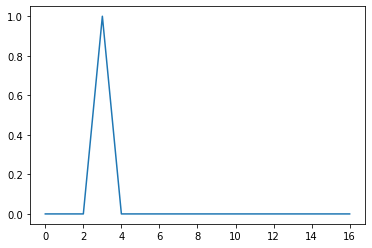

In [41]:
F_abs_amp = F_abs / N * 2 #交流成分はデータ数で割って２倍する。
F_abs_amp[0] = F_abs_amp[0] / 2 #直流成分は２倍不要
plt.plot(F_abs_amp[:int(N/2)+1])

振幅を変えてみる。

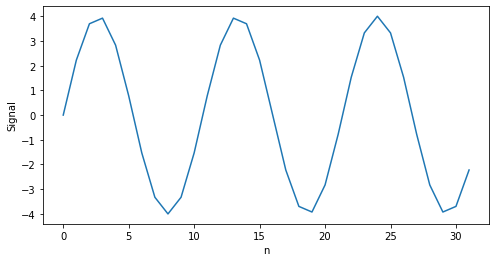

In [42]:
N = 32
n = np.arange(N)
freq = 3 # 周期
amp = 4 # 振幅
f = amp * np.sin(freq*2*np.pi*(n/N))

# グラフ表示
plt.figure(figsize=(8,4))
plt.xlabel('n')
plt.ylabel('Signal')
plt.plot(f)

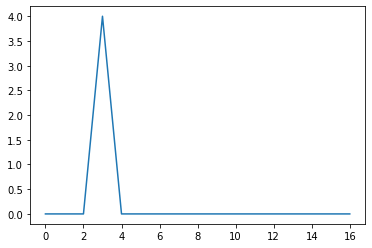

In [43]:
# 高速フーリエ変換
F = np.fft.fft(f)
# fftの結果（複素数）を絶対値変換
F_abs = np.abs(F)
# 振幅を元の信号に揃える
F_abs_amp = F_abs / N * 2
F_abs_amp[0] = F_abs_amp[0] / 2

plt.plot(F_abs_amp[:int(N/2)+1])

## 複雑な信号

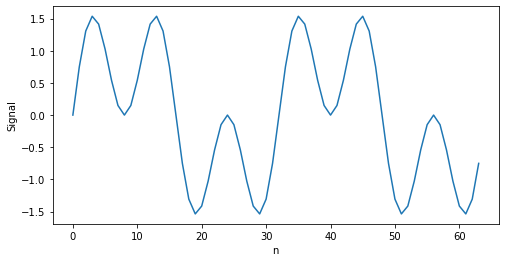

In [44]:
N = 64
n = np.arange(N)
f1 = 2
f2 =6
f = np.sin(f1*2*np.pi*(n/N)) + np.sin(f2*2*np.pi*(n/N))

plt.figure(figsize=(8,4))
plt.xlabel('n')
plt.ylabel('Signal')
plt.plot(f)

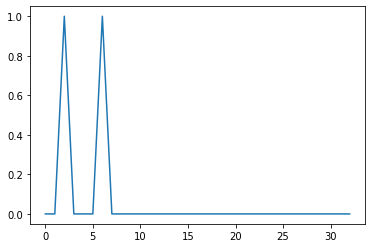

In [45]:
# フーリエ変換
F = np.fft.fft(f)
F_abs = np.abs(F)
F_abs_amp = F_abs/N*2
F_abs_amp[0] = F_abs_amp[0]/2

plt.plot(F_abs_amp[:int(N/2)+1])

# 自作FFTの確認

In [46]:
import sys, os, cis
import matplotlib.pyplot as plt
import numpy as np

In [47]:
sys.path.append('..')

In [48]:
from mylib.fft import fft

In [56]:
data, fs = cis.wavread('/Users/toranosuke/Desktop/dataset/s10/s10_downstairs_wall_trial2/C1_5_45/recording1_45_0.wav')

In [61]:
N = len(data)
N

144000

In [57]:
# 時間空間での表示
dt = 1/fs
d = len(data)/fs
t = np.arange(0, d, dt)

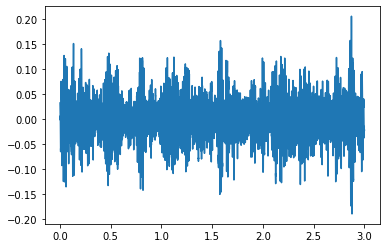

In [58]:
plt.plot(t, data)
plt.show()
plt.close()

## 最大ピーク

In [59]:
fft_array, fft_mean, fft_axis = fft(data, fs, 2**12, 0)

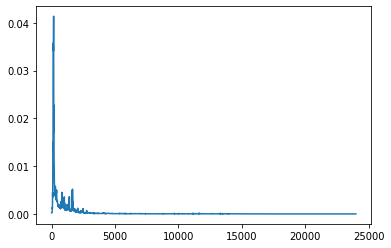

In [60]:
plt.plot(fft_axis, fft_mean)
plt.show()

## Scipyを使用した場合

In [54]:
import scipy.fftpack as sfft
import scipy.signal as ss
import math

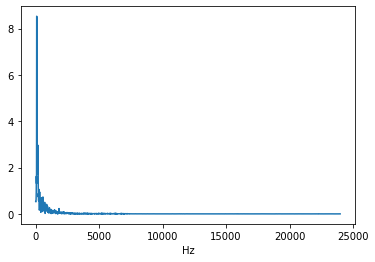

In [55]:
N = 2**12
cs = sfft.fft(data[:N])

# x軸の定義
hz_delta = fs/N
x = np.arange(0, fs/2, hz_delta)

# 描画
plt.xlabel('Hz')
plt.plot(x, np.abs(cs[:int(N/2)]))
plt.show()